In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("penguins.csv", encoding="utf-8", sep=",")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Проведём первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.

In [2]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [3]:
df.describe(include="O")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


Посмотрим типы полей. Как видим, есть пропущенные значения.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Посмотрим, есть ли строки, у которых пропущено несколько значений.

In [5]:
df.isna().sum(axis=1).value_counts()

0    333
1      9
5      2
Name: count, dtype: int64

Есть строки, в которых нехватает данных в 5 из 7 столбцов. Разумнее всего удалить такие строки.

In [6]:
df = df.dropna(thresh=3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Если не учитывать такие почти пустрые строки, то незаполненным остаётся только столбец Пол. Его можно заполнить наиболее популярным значением, а именно "male".

In [7]:
df["sex"] = df["sex"].fillna(value="male")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Посмотрим на соотношение полов:

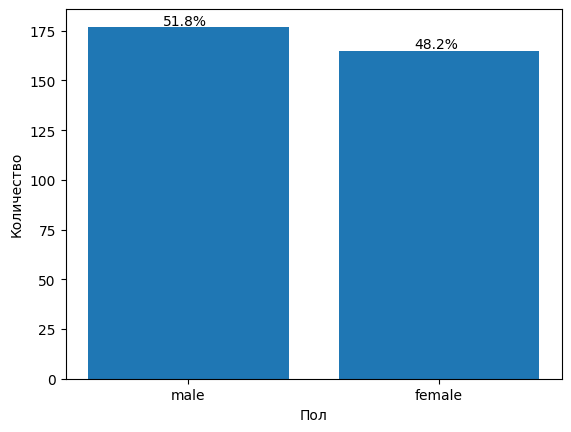

In [8]:
plt.bar(df["sex"].unique(), df["sex"].value_counts())
plt.xlabel("Пол")
plt.ylabel("Количество")
total = df["sex"].value_counts().sum()

for x, y in enumerate(df["sex"].value_counts()):
    plt.text(x - 0.1, y + 1, f"{round(y / total * 100, 1)}%")
    
plt.show()

Проверим наличие отклонений и аномалий в распределении значений признаков.  

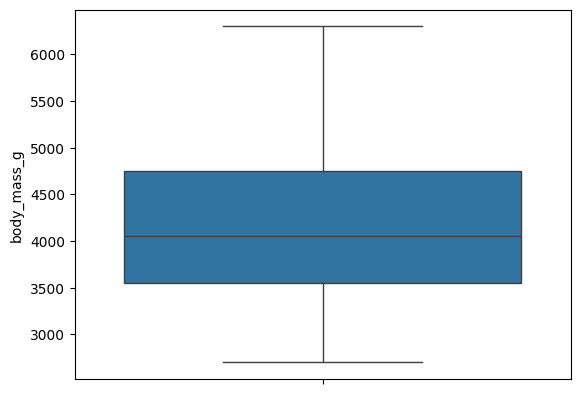

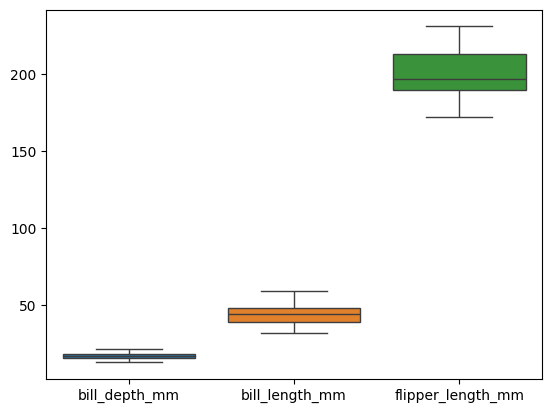

In [9]:
sns.boxplot(df["body_mass_g"]) 
plt.show() 

sns.boxplot(df[["bill_depth_mm", "bill_length_mm", "flipper_length_mm"]]) 
plt.show() 

С какого острова сколько померяли пингвинов

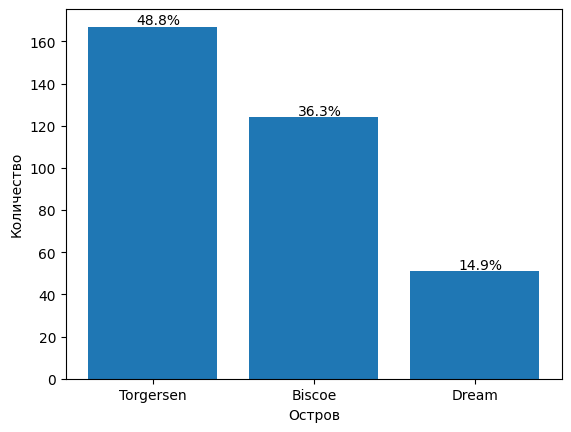

In [10]:
plt.bar(df["island"].unique(), df["island"].value_counts())
plt.xlabel("Остров")
plt.ylabel("Количество")
total = df["island"].value_counts().sum()

for x, y in enumerate(df["island"].value_counts()):
    plt.text(x - 0.1, y + 1, f"{round(y / total * 100, 1)}%")
    
plt.show()

Соотношение видов пингвинов в датасете: Adelie и Gentoo примерно поровну, Chinstrap в два раза меньше, чем других.

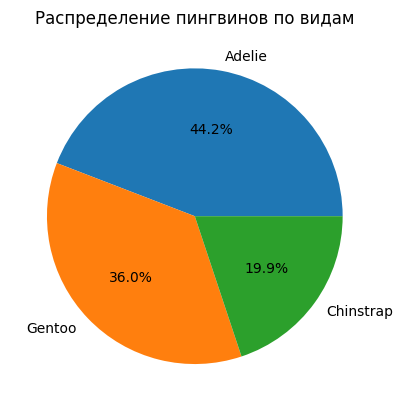

In [11]:
species = df["species"].value_counts()
plt.pie(species, labels=species.index, autopct="%1.1f%%")
plt.title('Распределение пингвинов по видам')
plt.show()

Выведим гистограмму для body_mass_g перед нормализацией

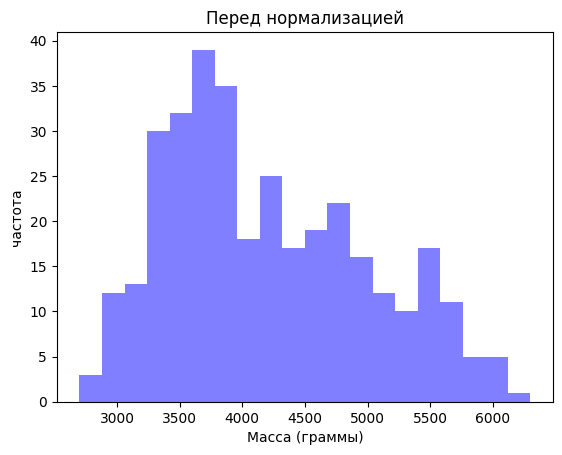

In [12]:
plt.hist(df['body_mass_g'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Масса (граммы)')
plt.ylabel('частота')
plt.title('Перед нормализацией')
plt.show()

Нормализуем столбец и построим диаграмму по новым данным. Как видим, даипазон оси X изменился

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['body_mass_norm'] = scaler.fit_transform(df[['body_mass_g']])

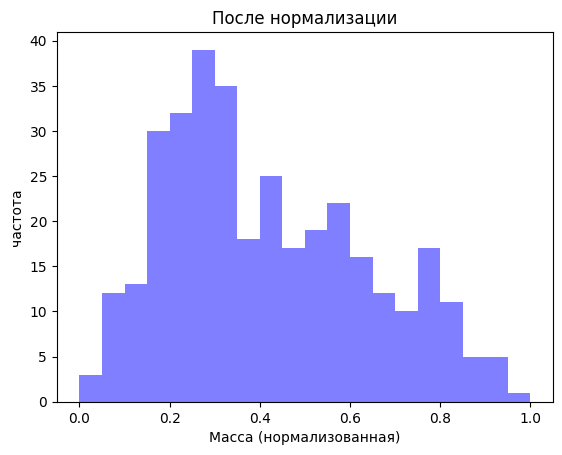

In [14]:
plt.hist(df['body_mass_norm'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Масса (нормализованная)')
plt.ylabel('частота')
plt.title('После нормализации')
plt.show()

Закодируем столбец sex с помощью Label encoding, столбцы island, species с помощью One-hot encoding.

In [15]:
from sklearn.preprocessing import LabelEncoder
dfp = df.copy()

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

df = pd.get_dummies(df, columns=['island'])
df = pd.get_dummies(df, columns=['species'])

df.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_norm,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,1,0.291667,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,0,0.305556,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,0,0.152778,False,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,0,0.208333,False,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,1,0.263889,False,False,True,True,False,False


Предположим наличие зависимости какой-либо пары признаков друг от друга. С помощью визуализации подтвердим или опровергним эту зависимость.

Возможно связаны столбцы с видом пингвина и островом.

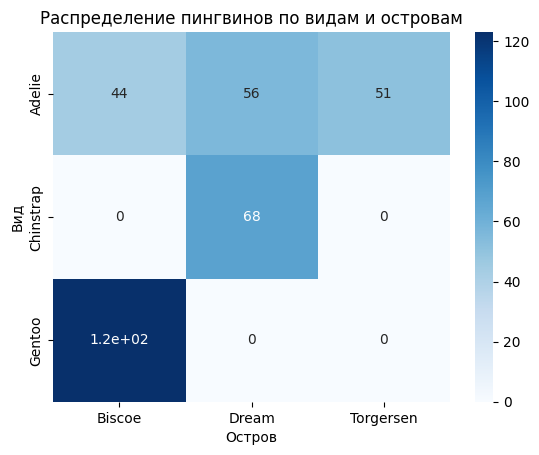

In [16]:
ct = pd.crosstab(dfp['species'], dfp['island'])

sns.heatmap(ct, annot=True, cmap='Blues')
plt.xlabel('Остров')
plt.ylabel('Вид')
plt.title('Распределение пингвинов по видам и островам')
plt.show() 

Действительно, пингвины Gentoo встречаются только на одном острове. На острове Torgersen встречается всего один вид пингвинов.

Построим «тепловую карту» зависимости признаков.

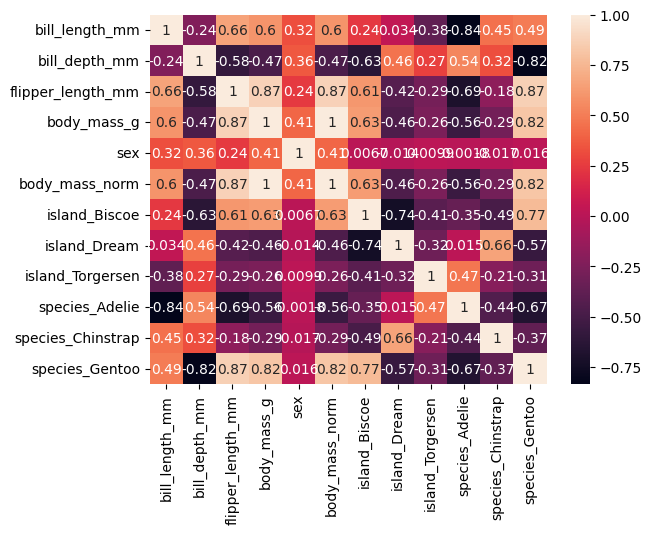

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Вывод: Пол слабо коррелирует с любым признаком, его можно не учитывать. Связь между видом пингвинов и островом имеется, она значима. Масса тела сильно коррелирует с длинной плавника, возможно можно учитывать только один из параметров

Применим метод главных компонент для уменьшения размерности

In [18]:
from sklearn.decomposition import PCA

n = 5
pca = PCA(n_components=n)
pca.fit(df)

df_pca = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(n)])
df_pca.head(3)


,PC0,PC1,PC2,PC3,PC4
0,0.004051,-0.309095,0.937106,-0.114085,-0.084161
1,-0.001162,0.090624,0.145197,0.948234,-0.051867
2,0.015275,-0.945381,-0.294690,0.137700,0.008562
